In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from xlogit import MultinomialLogit
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


In [2]:
purchase = pd.read_csv('purchase_cleaned.csv')
purchase.head(10)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5
0,1,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0
1,1,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
2,1,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0
3,1,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0
4,1,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0
5,1,23,0,0,0,0,0,1.50,1.90,1.99,2.09,2.66,0,0,0,0,0
6,1,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0
7,1,37,0,0,0,2,1,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0
8,1,41,0,0,0,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0
9,1,43,0,0,0,0,0,1.35,1.58,1.97,2.09,2.67,1,1,1,0,0


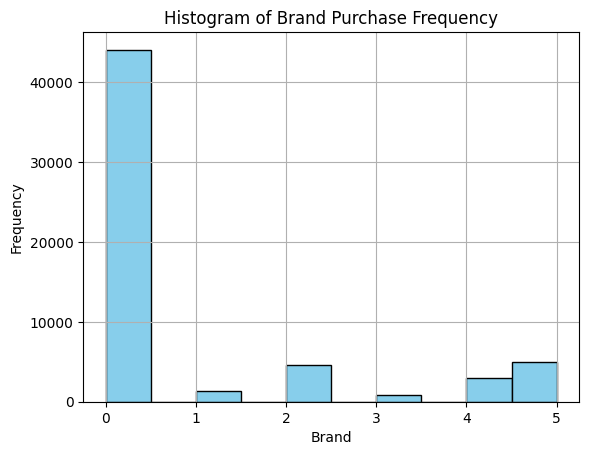

In [3]:
plt.hist(purchase['Brand'], color='skyblue', edgecolor='black')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.title('Histogram of Brand Purchase Frequency')
plt.grid(True)
plt.show()

In [4]:
categorical_columns = ['Brand', 'Last_Inc_Brand']
purchase_encoded = pd.get_dummies(purchase, columns=categorical_columns)
purchase_encoded.head()

,ID,Day,Incidence,Quantity,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,...,Brand_2,Brand_3,Brand_4,Brand_5,Last_Inc_Brand_0,Last_Inc_Brand_1,Last_Inc_Brand_2,Last_Inc_Brand_3,Last_Inc_Brand_4,Last_Inc_Brand_5
0,1,1,0,0,0,1.59,1.87,2.01,2.09,2.66,...,0,0,0,0,1,0,0,0,0,0
1,1,11,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,0,0,0,1,0,0,0,0,0
2,1,12,0,0,0,1.51,1.89,1.99,2.09,2.66,...,0,0,0,0,1,0,0,0,0,0
3,1,16,0,0,0,1.52,1.89,1.98,2.09,2.66,...,0,0,0,0,1,0,0,0,0,0
4,1,18,0,0,0,1.52,1.89,1.99,2.09,2.66,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# for brand in range(1, 6):
#     promotions = [f'Promotion_{i}' for i in range(2, 6)]
#     purchase_encoded[f'Any_Other_Brand_Promotion_{brand}'] = purchase_encoded[promotions].max(axis=1)

In [5]:
purchase_encoded.columns

Index(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Quantity', 'Price_1',
       'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1',
       'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Brand_0',
       'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5',
       'Last_Inc_Brand_0', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5'],
      dtype='object')

In [6]:
# drop 1 column for each categorical variable to avoid multicollinearity
purchase_encoded = purchase_encoded.drop(['Brand_0', 'Last_Inc_Brand_0'], axis = 1)
purchase_encoded.columns

Index(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Quantity', 'Price_1',
       'Price_2', 'Price_3', 'Price_4', 'Price_5', 'Promotion_1',
       'Promotion_2', 'Promotion_3', 'Promotion_4', 'Promotion_5', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5', 'Last_Inc_Brand_1',
       'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
       'Last_Inc_Brand_5'],
      dtype='object')

In [7]:
customer = pd.read_csv('segmentation-data.csv')
customer.tail(5)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [8]:
customer['ID'] = customer['ID'] - 100000000

In [9]:
numerical_columns = ['Age', 'Income']
scaler = StandardScaler()
customer[numerical_columns] = scaler.fit_transform(customer[numerical_columns])

In [10]:
categorical_columns = ['Education', 'Occupation', 'Settlement size']
customer_encoded = pd.get_dummies(customer, columns=categorical_columns)
customer_encoded.head()

,ID,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,1,0,0,2.653614,0.097524,0,0,1,0,0,1,0,0,0,1
1,2,1,1,-1.187132,0.782654,0,1,0,0,0,1,0,0,0,1
2,3,0,0,1.117316,-0.833202,0,1,0,0,1,0,0,1,0,0
3,4,0,0,0.775916,1.328386,0,1,0,0,0,1,0,0,1,0
4,5,0,0,1.458716,0.736932,0,1,0,0,0,1,0,0,1,0


In [11]:
# drop 1 column for each categorical variable to avoid multicollinearity
customer_encoded = customer_encoded.drop(['Education_0', 'Occupation_0', 'Settlement size_0'], axis = 1)
customer_encoded.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2'],
      dtype='object')

In [12]:
customer_encoded.head()

,ID,Sex,Marital status,Age,Income,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,Settlement size_1,Settlement size_2
0,1,0,0,2.653614,0.097524,0,1,0,1,0,0,1
1,2,1,1,-1.187132,0.782654,1,0,0,1,0,0,1
2,3,0,0,1.117316,-0.833202,1,0,0,0,0,0,0
3,4,0,0,0.775916,1.328386,1,0,0,1,0,1,0
4,5,0,0,1.458716,0.736932,1,0,0,1,0,1,0


In [13]:
customer_encoded.to_csv('customer_encoded.csv')

In [14]:
merged_data = pd.merge(customer_encoded, purchase_encoded, on='ID')
merged_data.head(5)

,ID,Sex,Marital status,Age,Income,Education_1,Education_2,Education_3,Occupation_1,Occupation_2,...,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Last_Inc_Brand_1,Last_Inc_Brand_2,Last_Inc_Brand_3,Last_Inc_Brand_4,Last_Inc_Brand_5
0,1,0,0,2.653614,0.097524,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2.653614,0.097524,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,2.653614,0.097524,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,2.653614,0.097524,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,2.653614,0.097524,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
merged_data.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Day', 'Incidence',
       'Quantity', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5'],
      dtype='object')

# 1. Regression with customer attributes (buy/not buy based on customer information)

In [16]:
features = merged_data[['Sex', 'Marital status', 'Age', 'Income',
                        'Education_1', 'Education_2', 'Education_3',
                        'Occupation_1', 'Occupation_2',
                        'Settlement size_1', 'Settlement size_2']]
target = merged_data['Incidence']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

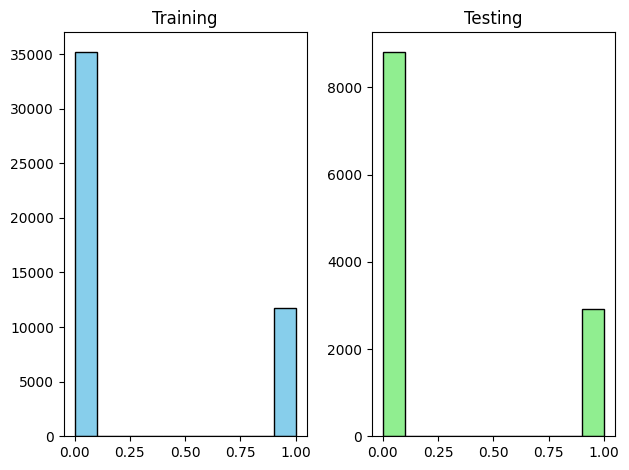

In [17]:
plt.subplot(1, 2, 1)
plt.hist(y_train, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [18]:
X_train = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.554379
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Incidence   No. Observations:                46954
Model:                          Logit   Df Residuals:                    46942
Method:                           MLE   Df Model:                           11
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                 0.01343
Time:                        15:05:46   Log-Likelihood:                -26030.
converged:                       True   LL-Null:                       -26385.
Covariance Type:            nonrobust   LLR p-value:                7.576e-145
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9444      0.039    -24.174      0.000      -1.021      -0.868
Sex     

In [19]:
X_test = sm.add_constant(X_test)
y_pred_probs = result.predict(X_test)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

Accuracy: 0.7542380100519636


In [20]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8822
           1       0.69      0.02      0.04      2917

    accuracy                           0.75     11739
   macro avg       0.72      0.51      0.45     11739
weighted avg       0.74      0.75      0.66     11739



# 2. Regression with brand attributes and customer buying history (buy/not buy the certain brand based on price, promotion & buying history)

In [21]:
purchase_filtered = purchase_encoded[purchase_encoded['Incidence']==1]

In [22]:
merged_data1 = pd.merge(customer_encoded, purchase_filtered, on='ID')
merged_data1.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Day', 'Incidence',
       'Quantity', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Brand_1', 'Brand_2', 'Brand_3',
       'Brand_4', 'Brand_5', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5'],
      dtype='object')

## 2.1 Brand 1

In [23]:
features2 = merged_data1[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5']]
target2 = merged_data1['Brand_1']

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size=0.2, random_state=42)

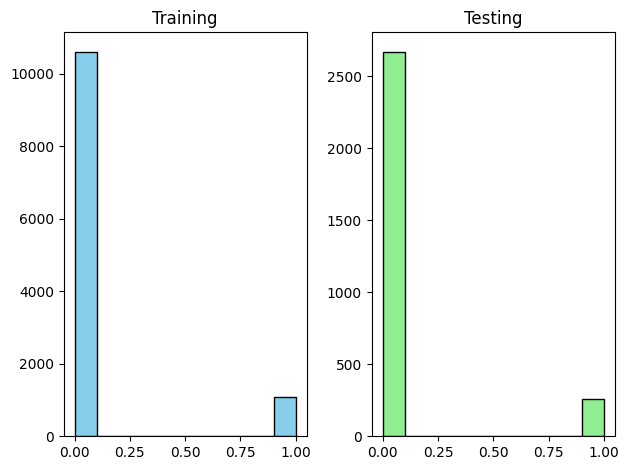

In [24]:
plt.subplot(1, 2, 1)
plt.hist(y_train2, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test2, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [25]:
X_train2 = sm.add_constant(X_train2)
logit_model2 = sm.Logit(y_train2, X_train2)
result2 = logit_model2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Brand_1   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11694
Method:                           MLE   Df Model:                           15
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                     inf
Time:                        15:06:10   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.5319      1.934     -1.826      0.068      -7.322       0.258
Price_1         

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [26]:
X_test2 = sm.add_constant(X_test2)
y_pred_probs2 = result2.predict(X_test2)
y_pred_binary2 = [1 if prob > 0.5 else 0 for prob in y_pred_probs2]
accuracy2 = accuracy_score(y_test2, y_pred_binary2)
print("Accuracy:", accuracy2)

Accuracy: 0.9115437158469946


In [27]:
print(classification_report(y_test2, y_pred_binary2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2672
           1       0.48      0.14      0.22       256

    accuracy                           0.91      2928
   macro avg       0.70      0.56      0.59      2928
weighted avg       0.88      0.91      0.89      2928



## 2.2 Brand 2

In [28]:
features3 = merged_data1[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5']]
target3 = merged_data1['Brand_2']

X_train3, X_test3, y_train3, y_test3 = train_test_split(features3, target3, test_size=0.2, random_state=42)

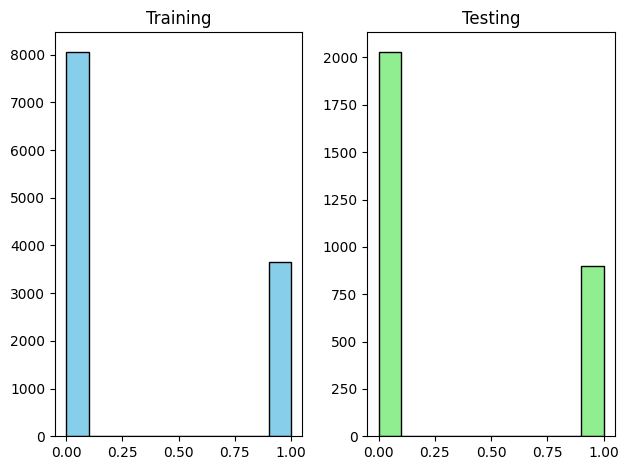

In [29]:
plt.subplot(1, 2, 1)
plt.hist(y_train3, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test3, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [30]:
X_train3 = sm.add_constant(X_train3)
logit_model3 = sm.Logit(y_train3, X_train3)
result3 = logit_model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Brand_2   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11694
Method:                           MLE   Df Model:                           15
Date:                Fri, 19 Apr 2024   Pseudo R-squ.:                     inf
Time:                        15:06:22   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.3617      1.261     -1.873      0.061      -4.833       0.110
Price_1         

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [31]:
X_test3 = sm.add_constant(X_test3)
y_pred_probs3 = result3.predict(X_test3)
y_pred_binary3 = [1 if prob > 0.5 else 0 for prob in y_pred_probs3]
accuracy3 = accuracy_score(y_test3, y_pred_binary3)
print("Accuracy:", accuracy3)

Accuracy: 0.7489754098360656


In [32]:
print(classification_report(y_test3, y_pred_binary3))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      2031
           1       0.62      0.46      0.53       897

    accuracy                           0.75      2928
   macro avg       0.70      0.67      0.68      2928
weighted avg       0.74      0.75      0.74      2928



## 2.3 Brand 3

In [ ]:
features4 = merged_data1[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5']]
target4 = merged_data1['Brand_3']

X_train4, X_test4, y_train4, y_test4 = train_test_split(features4, target4, test_size=0.2, random_state=42)

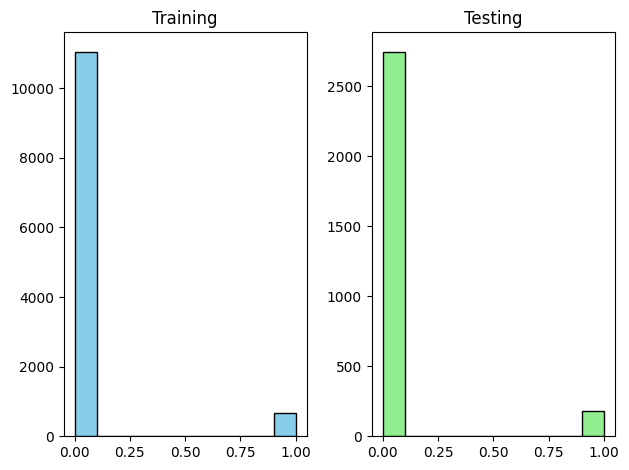

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(y_train4, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test4, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [ ]:
X_train4 = sm.add_constant(X_train4)
logit_model4 = sm.Logit(y_train4, X_train4)
result4 = logit_model4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Brand_3   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11694
Method:                           MLE   Df Model:                           15
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                     inf
Time:                        21:24:39   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -14.7313      2.525     -5.835      0.000     -19.680      -9.783
Price_1         

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
X_test4 = sm.add_constant(X_test4)
y_pred_probs4 = result4.predict(X_test4)
y_pred_binary4 = [1 if prob > 0.5 else 0 for prob in y_pred_probs4]
accuracy4 = accuracy_score(y_test4, y_pred_binary4)
print("Accuracy:", accuracy4)

Accuracy: 0.9477459016393442


In [ ]:
print(classification_report(y_test4, y_pred_binary4))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2746
           1       0.78      0.22      0.34       182

    accuracy                           0.95      2928
   macro avg       0.87      0.61      0.66      2928
weighted avg       0.94      0.95      0.93      2928



## 2.4 Brand 4

In [ ]:
features5 = merged_data1[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5']]
target5 = merged_data1['Brand_4']

X_train5, X_test5, y_train5, y_test5 = train_test_split(features5, target5, test_size=0.2, random_state=42)

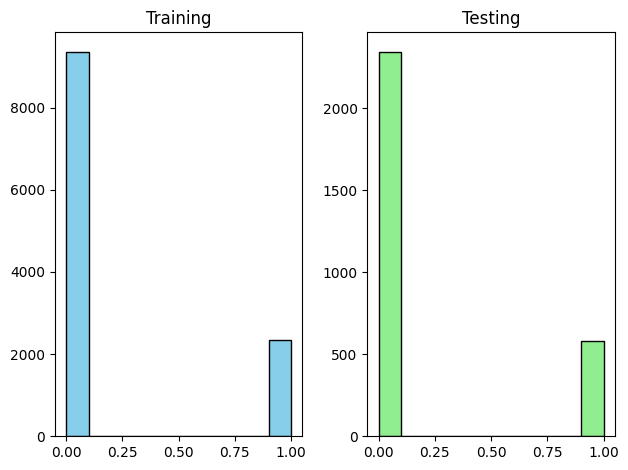

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(y_train5, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test5, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [ ]:
X_train5 = sm.add_constant(X_train5)
logit_model5 = sm.Logit(y_train5, X_train5)
result5 = logit_model5.fit()
print(result5.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Brand_4   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11694
Method:                           MLE   Df Model:                           15
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                     inf
Time:                        21:25:19   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.2955      1.473     -0.879      0.379      -4.183       1.592
Price_1         

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
X_test5 = sm.add_constant(X_test5)
y_pred_probs5 = result5.predict(X_test5)
y_pred_binary5 = [1 if prob > 0.5 else 0 for prob in y_pred_probs5]
accuracy5 = accuracy_score(y_test5, y_pred_binary5)
print("Accuracy:", accuracy5)

Accuracy: 0.8490437158469946


In [ ]:
print(classification_report(y_test5, y_pred_binary5))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2345
           1       0.81      0.32      0.46       583

    accuracy                           0.85      2928
   macro avg       0.83      0.65      0.68      2928
weighted avg       0.84      0.85      0.82      2928



## 2.5 Brand 5

In [ ]:
features6 = merged_data1[['Price_1', 'Price_2', 'Price_3',
                     'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
                     'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1',
                     'Last_Inc_Brand_2', 'Last_Inc_Brand_3', 'Last_Inc_Brand_4',
                     'Last_Inc_Brand_5']]
target6 = merged_data1['Brand_5']

X_train6, X_test6, y_train6, y_test6 = train_test_split(features6, target6, test_size=0.2, random_state=42)

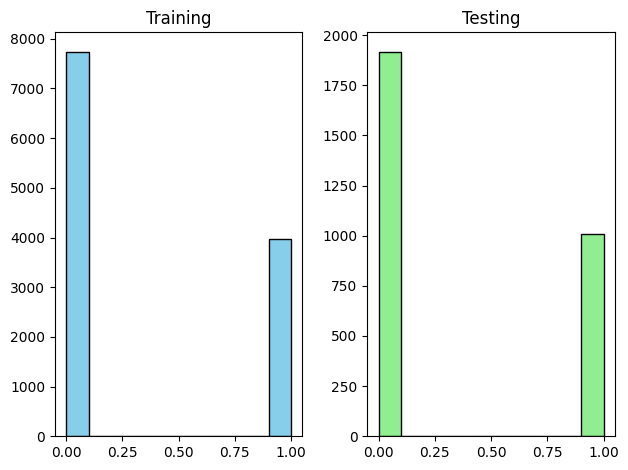

In [ ]:
plt.subplot(1, 2, 1)
plt.hist(y_train6, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test6, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [ ]:
X_train6 = sm.add_constant(X_train6)
logit_model6 = sm.Logit(y_train6, X_train6)
result6 = logit_model6.fit()
print(result6.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Brand_5   No. Observations:                11710
Model:                          Logit   Df Residuals:                    11694
Method:                           MLE   Df Model:                           15
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                     inf
Time:                        21:26:27   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8988      1.357      2.136      0.033       0.239       5.558
Price_1         

c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
X_test6 = sm.add_constant(X_test6)
y_pred_probs6 = result6.predict(X_test6)
y_pred_binary6 = [1 if prob > 0.5 else 0 for prob in y_pred_probs6]
accuracy6 = accuracy_score(y_test6, y_pred_binary6)
print("Accuracy:", accuracy6)

Accuracy: 0.792691256830601


In [ ]:
print(classification_report(y_test6, y_pred_binary6))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1918
           1       0.84      0.49      0.62      1010

    accuracy                           0.79      2928
   macro avg       0.81      0.72      0.74      2928
weighted avg       0.80      0.79      0.78      2928



## 2.6 Using Multinomial Logit Model

In [35]:
purchase_encoded2 = pd.get_dummies(purchase, columns=['Last_Inc_Brand'])
purchase_encoded2 = purchase_encoded2.drop(['Last_Inc_Brand_0'], axis = 1)
purchase_encoded2.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Last_Inc_Brand_1,Last_Inc_Brand_2,Last_Inc_Brand_3,Last_Inc_Brand_4,Last_Inc_Brand_5
0,1,1,0,0,0,0,1.59,1.87,2.01,2.09,...,0,1,0,0,0,0,0,0,0,0
1,1,11,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,0,0,0,0,0
2,1,12,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,0,0,0,0,0
3,1,16,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,0,0,0,0,0
4,1,18,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,0,0,0,0,0


In [36]:
merged_data2 = pd.merge(customer_encoded, purchase_encoded2, on='ID')
merged_data2.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Day', 'Incidence', 'Brand',
       'Quantity', 'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3',
       'Price_4', 'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5'],
      dtype='object')

### 2.6.1 Use all data

In [37]:
X = merged_data2[['Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Last_Inc_Quantity',
       'Price_1', 'Price_2', 'Price_3','Price_4', 'Price_5',
       'Promotion_1', 'Promotion_2', 'Promotion_3','Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5']]
y = merged_data2['Brand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

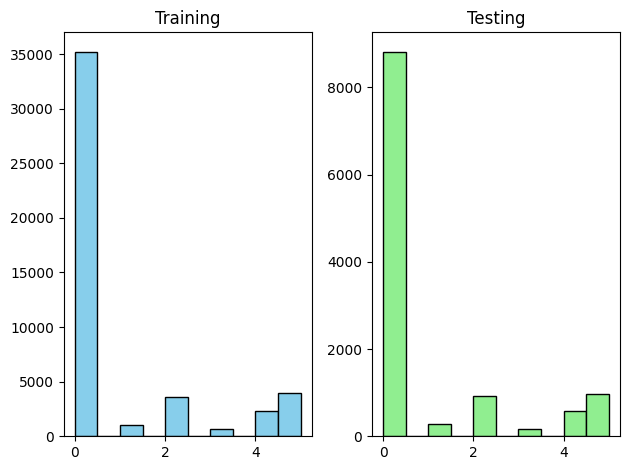

In [38]:
plt.subplot(1, 2, 1)
plt.hist(y_train, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [39]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86      8822
           1       0.00      0.00      0.00       277
           2       0.62      0.01      0.01       927
           3       0.00      0.00      0.00       162
           4       0.20      0.00      0.00       576
           5       0.56      0.30      0.39       975

    accuracy                           0.76     11739
   macro avg       0.36      0.21      0.21     11739
weighted avg       0.68      0.76      0.68     11739



c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.p

# 2.6.2 Use filtered data (incidence == 1)

In [40]:
merged_data2_filtered = merged_data2[merged_data2['Incidence']==1]

X = merged_data2_filtered[['Sex', 'Marital status', 'Age', 'Income', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_1', 'Occupation_2',
       'Settlement size_1', 'Settlement size_2', 'Last_Inc_Quantity',
       'Price_1', 'Price_2', 'Price_3','Price_4', 'Price_5',
       'Promotion_1', 'Promotion_2', 'Promotion_3','Promotion_4', 'Promotion_5', 'Last_Inc_Brand_1', 'Last_Inc_Brand_2',
       'Last_Inc_Brand_3', 'Last_Inc_Brand_4', 'Last_Inc_Brand_5']]
y = merged_data2_filtered['Brand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

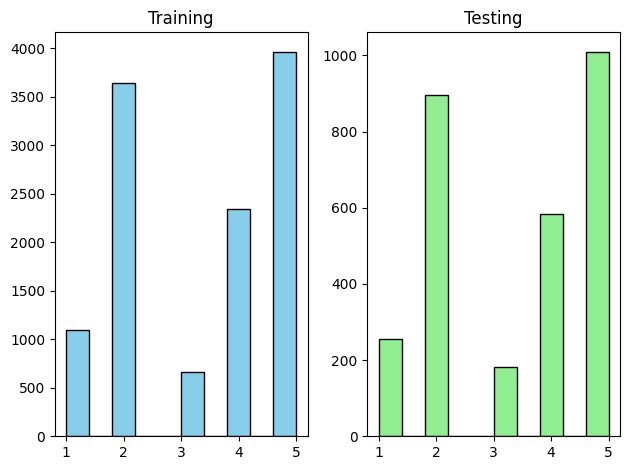

In [41]:
plt.subplot(1, 2, 1)
plt.hist(y_train, color='skyblue', edgecolor='black')
plt.title('Training')
plt.subplot(1, 2, 2)
plt.hist(y_test, color='lightgreen', edgecolor='black')
plt.title('Testing')
plt.tight_layout()
plt.show()

In [42]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.43      0.17      0.25       256
           2       0.50      0.82      0.62       897
           3       0.78      0.22      0.34       182
           4       0.63      0.38      0.47       583
           5       0.68      0.65      0.66      1010

    accuracy                           0.58      2928
   macro avg       0.60      0.45      0.47      2928
weighted avg       0.60      0.58      0.56      2928



c:\Users\user1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'coefficient': coefficients[0]})
coefficients_df = coefficients_df.sort_values(by='coefficient', ascending=False)
coefficients_df

,Feature,coefficient
22,Last_Inc_Brand_1,1.863706
15,Price_4,0.844064
14,Price_3,0.799541
13,Price_2,0.794364
11,Last_Inc_Quantity,0.401032
10,Settlement size_2,0.296967
5,Education_2,0.252062
8,Occupation_2,0.194031
24,Last_Inc_Brand_3,0.177279
0,Sex,0.158844
